In [1]:
import scipy
import numpy as np
from helpers.iaml_cw2_helpers import *
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline

# iaml212cw2_q2_1()

In [2]:
Xtrn_org , Ytrn_org , Xtst_org , Ytst_org = load_Q2_dataset ( )
Xtrn = Xtrn_org / 255.0
Xtst = Xtst_org / 255.0
Ytrn = Ytrn_org - 1
Ytst = Ytst_org - 1
Xmean = np.mean(Xtrn, axis = 0)
#Xmean1 = np.mean(Xtst,axis =0)
#print(Xmean[:10],Xmean1[:10])
Xtrn_m = Xtrn - Xmean 
Xtst_m = Xtst - Xmean
print(Xtrn.shape)

(7800, 784)


In [3]:
meta_data = pd.DataFrame(columns = ["Mean","Minimum","Maximum","Standard deviation"])
#meta_data_Xtst = pd.DataFrame(columns = ["Mean","Minimum","Maximum","Standard deviation"])
#for i in range(0,Xtrn.shape[0]):
meta_data.at[0,"Mean"]= np.mean(Xtrn)
meta_data.at[0,"Minimum"] = np.min(Xtrn)
meta_data.at[0,"Maximum"] = np.max(Xtrn)
meta_data.at[0,"Standard deviation"] = np.std(Xtrn)
#for i in range(0,Xtst.shape[0]):
meta_data.at[1,"Mean"]= np.mean(Xtst)
meta_data.at[1,"Minimum"] = np.min(Xtst)
meta_data.at[1,"Maximum"] = np.max(Xtst)
meta_data.at[1,"Standard deviation"] = np.std(Xtst)

In [4]:
print(meta_data)
print(Ytrn[:2])

       Mean Minimum Maximum Standard deviation
0  0.177377     0.0     1.0           0.334982
1  0.175634     0.0     1.0           0.333463
[10  2]


K
C


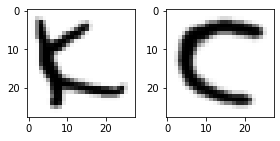

In [9]:
import string
fig , ax = plt.subplots(1,2,figsize=(4,4))
for i in range(0,2):
    ax[i].imshow(Xtrn[i].reshape((28,28)).T,cmap = 'gray_r')
    print(string.ascii_uppercase[Ytrn[i]])
fig.tight_layout()
#fig.savefig("q2_1.pdf")

# iaml212cw2_q2_3()

In [29]:
#0,5,8
label_A = np.where(Ytrn == 0)
label_F = np.where(Ytrn == 5)
label_I = np.where(Ytrn == 8)
#for k in [3,5]:
k=3
clusters_A = KMeans(n_clusters = k,random_state =0).fit(Xtrn[label_A,:][0])
clusters_F = KMeans(n_clusters = k,random_state =0).fit(Xtrn[label_F,:][0])
clusters_I = KMeans(n_clusters= k,random_state =0).fit(Xtrn[label_I,:][0])

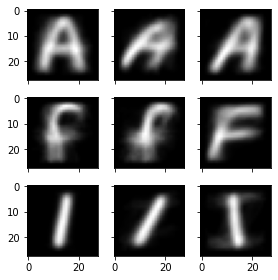

In [13]:
fig, ax = plt.subplots(3,3,sharex = True,sharey= True,figsize = (4,4))
ax[0,0].imshow(clusters_A.cluster_centers_[0].reshape(28,28).T,cmap = 'gray')
ax[0,1].imshow(clusters_A.cluster_centers_[1].reshape(28,28).T,cmap = 'gray')
ax[0,2].imshow(clusters_A.cluster_centers_[2].reshape(28,28).T,cmap = 'gray')
ax[1,0].imshow(clusters_F.cluster_centers_[0].reshape(28,28).T,cmap = 'gray')
ax[1,1].imshow(clusters_F.cluster_centers_[1].reshape(28,28).T,cmap = 'gray')
ax[1,2].imshow(clusters_F.cluster_centers_[2].reshape(28,28).T,cmap = 'gray')
ax[2,0].imshow(clusters_I.cluster_centers_[0].reshape(28,28).T,cmap = 'gray')
ax[2,1].imshow(clusters_I.cluster_centers_[1].reshape(28,28).T,cmap = 'gray')
ax[2,2].imshow(clusters_I.cluster_centers_[2].reshape(28,28).T,cmap = 'gray')
fig.tight_layout()
fig.savefig("q2_3.pdf")

In [15]:
k=5
clusters_A_5 = KMeans(n_clusters = k,random_state =0).fit(Xtrn[label_A,:][0])
clusters_F_5 = KMeans(n_clusters = k,random_state =0).fit(Xtrn[label_F,:][0])
clusters_I_5 = KMeans(n_clusters= k,random_state =0).fit(Xtrn[label_I,:][0])

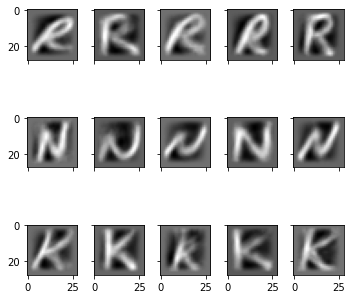

In [27]:
k=5
label_L = np.where(Ytrn == 17)
label_K = np.where(Ytrn == 10)
label_R = np.where(Ytrn == 13)
clusters_L_5 = KMeans(n_clusters= k,random_state =0).fit(Xtrn_m[label_L,:][0])
clusters_R_5 = KMeans(n_clusters= k,random_state =0).fit(Xtrn_m[label_R,:][0])
clusters_K_5 = KMeans(n_clusters= k,random_state =0).fit(Xtrn_m[label_K,:][0])
fig, ax = plt.subplots(3,5,sharex = True,sharey = True,figsize = (5,5))
for j in range(0,5):
    ax[0,j].imshow(clusters_L_5.cluster_centers_[j].reshape(28,28).T,cmap = 'gray')
    ax[1,j].imshow(clusters_R_5.cluster_centers_[j].reshape(28,28).T,cmap = 'gray')
    ax[2,j].imshow(clusters_K_5.cluster_centers_[j].reshape(28,28).T,cmap = 'gray')
fig.tight_layout()
fig.savefig("q2_exp2.pdf")

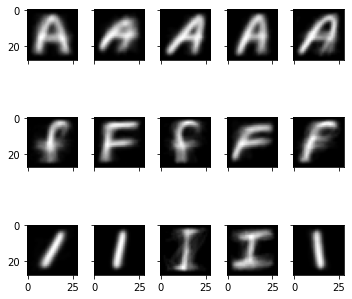

In [23]:
fig, ax = plt.subplots(3,5,sharex = True,sharey = True,figsize = (5,5))
for j in range(0,5):
    ax[0,j].imshow(clusters_A_5.cluster_centers_[j].reshape(28,28).T,cmap = 'gray')
    ax[1,j].imshow(clusters_F_5.cluster_centers_[j].reshape(28,28).T,cmap = 'gray')
    ax[2,j].imshow(clusters_I_5.cluster_centers_[j].reshape(28,28).T,cmap = 'gray')
fig.tight_layout()
fig.savefig("q2_3_2.pdf")

# iaml212cw2_q2_5()

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000, random_state = 0).fit(Xtrn_m,Ytrn)

In [25]:
lr.score(Xtrn_m,Ytrn) #training accuracy

0.9161538461538462

In [26]:
lr.score(Xtst_m,Ytst) #test accuracy

0.7223076923076923

In [32]:
from sklearn.linear_model import LogisticRegression
lr_test1 = LogisticRegression(max_iter = 1000, penalty = 'none' ,random_state = 0).fit(Xtrn_m,Ytrn)
print(lr_test1.score(Xtrn_m,Ytrn)," ",lr_test1.score(Xtst_m,Ytst))

1.0   0.6107692307692307


In [33]:
from sklearn.linear_model import LogisticRegression
lr_test2 = LogisticRegression(max_iter = 1000, solver = 'saga' ,random_state = 0).fit(Xtrn_m,Ytrn)
print(lr_test2.score(Xtrn_m,Ytrn)," ",lr_test2.score(Xtst_m,Ytst))

0.9161538461538462   0.7223076923076923


In [34]:
#from sklearn.linear_model import LogisticRegression
lr_test3 = LogisticRegression(max_iter = 2000, solver = 'saga' ,random_state = 0).fit(Xtrn_m,Ytrn)
print(lr_test3.score(Xtrn_m,Ytrn)," ",lr_test3.score(Xtst_m,Ytst))

0.9161538461538462   0.7223076923076923


In [3]:
from sklearn.linear_model import LogisticRegression
lr_test4 = LogisticRegression(max_iter = 1000, solver = 'saga' ,penalty = 'l1', random_state = 0).fit(Xtrn_m,Ytrn)
print(lr_test4.score(Xtrn_m,Ytrn)," ",lr_test4.score(Xtst_m,Ytst))

0.8784615384615385   0.7403846153846154


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [27]:
print(Xtst_m.shape)
misclassify = dict.fromkeys(range(0,26),0)
#print(misclassify)
val = lr.predict(Xtst_m)
for i,j in zip(val,Ytst):
    if(i!=j):
        misclassify[j] = misclassify[j]+1
print(misclassify)

(2600, 784)
{0: 32, 1: 30, 2: 10, 3: 16, 4: 34, 5: 23, 6: 29, 7: 27, 8: 42, 9: 33, 10: 38, 11: 53, 12: 12, 13: 36, 14: 18, 15: 13, 16: 28, 17: 48, 18: 26, 19: 10, 20: 27, 21: 26, 22: 22, 23: 35, 24: 25, 25: 29}


In [28]:
sorted_misclassify = dict(sorted(misclassify.items(), key=lambda item: item[1],reverse = True))

In [29]:
for key,value in sorted_misclassify.items():
    print(string.ascii_uppercase[key]," misclassified ",value," times")
#print(sum(misclassify.values()))

L  misclassified  53  times
R  misclassified  48  times
I  misclassified  42  times
K  misclassified  38  times
N  misclassified  36  times
X  misclassified  35  times
E  misclassified  34  times
J  misclassified  33  times
A  misclassified  32  times
B  misclassified  30  times
G  misclassified  29  times
Z  misclassified  29  times
Q  misclassified  28  times
H  misclassified  27  times
U  misclassified  27  times
S  misclassified  26  times
V  misclassified  26  times
Y  misclassified  25  times
F  misclassified  23  times
W  misclassified  22  times
O  misclassified  18  times
D  misclassified  16  times
P  misclassified  13  times
M  misclassified  12  times
C  misclassified  10  times
T  misclassified  10  times


# iaml212cw2_q2_6()

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000, random_state = 0,C=2).fit(Xtrn_m,Ytrn)

In [6]:
print(lr.score(Xtrn_m,Ytrn)," ",lr.score(Xtst_m,Ytst))

0.941923076923077   0.7073076923076923


In [7]:
C = np.logspace(-2,2,13)
for c in C:
    lr = LogisticRegression(max_iter = 1000, random_state = 0,C=c).fit(Xtrn_m,Ytrn)
    print(lr.score(Xtst_m,Ytst))

0.7207692307692307
0.7430769230769231
0.7530769230769231
0.7473076923076923
0.7442307692307693
0.7369230769230769
0.7223076923076923
0.7061538461538461
0.6865384615384615
0.6657692307692308
0.6523076923076923


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6476923076923077
0.6453846153846153


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
optimalc = C[2]#given the maximum value
lr_test = LogisticRegression(max_iter = 1000, solver = 'saga' ,penalty = 'l1', random_state = 0,C=optimalc).fit(Xtrn_m,Ytrn)
print(lr_test.score(Xtrn_m,Ytrn)," ",lr_test.score(Xtst_m,Ytst))

0.6926923076923077   0.6403846153846153


In [10]:
print(C)

[1.00000000e-02 2.15443469e-02 4.64158883e-02 1.00000000e-01
 2.15443469e-01 4.64158883e-01 1.00000000e+00 2.15443469e+00
 4.64158883e+00 1.00000000e+01 2.15443469e+01 4.64158883e+01
 1.00000000e+02]


# iaml212cw2_q2_7()

In [30]:
x = Xtrn_m[label_A,:][0]
mean_x = []
for i in range(x.shape[1]):
    mean_x.append(np.mean(x[:,i]))
print(len(mean_x))

784


In [31]:
covariance_matrix = np.cov(x.T)
print(covariance_matrix.shape)

(784, 784)


In [35]:
mean_cov_matrix = np.mean(covariance_matrix)
min_cov_matrix = np.min(covariance_matrix)
max_cov_matrix = np.max(covariance_matrix)
print(mean_cov_matrix," ",min_cov_matrix," ",max_cov_matrix)
print(np.diagonal(covariance_matrix).shape)
diagnol_matrix = np.diagonal(covariance_matrix)
mean_diag_matrix = np.mean(diagnol_matrix)
min_diag_matrix = np.min(diagnol_matrix)
max_diag_matrix = np.max(diagnol_matrix)
print("diagonal matrix meta data")
print(mean_diag_matrix," ",min_diag_matrix," ",max_diag_matrix)

0.001708791632836062   -0.09747401775408393   0.18378613679585562
(784,)
diagonal matrix meta data
0.07231314807821394   0.0   0.18378613679585562


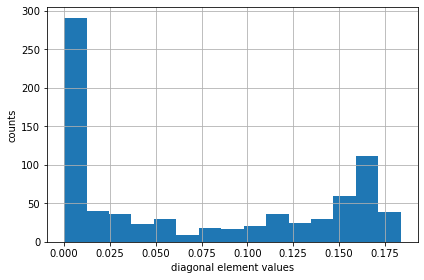

In [37]:
n_bins =15
plt.hist(np.diagonal(covariance_matrix),bins = n_bins)
plt.xlabel("diagonal element values")
plt.ylabel("counts")
plt.grid()
plt.tight_layout()
plt.savefig("q2_7.pdf")
plt.show()

In [30]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=mean_x, cov=covariance_matrix)

LinAlgError: singular matrix

# iaml212cw2_q2_8()

In [31]:
labels_A_test = np.where(Ytst== 0)[0]
xtst_A = Xtst_m[labels_A_test]
#var.pdf(Xtst_m[labels_A_test[0]])

In [32]:
print(Xtst_m[labels_A_test[0]].shape)
print(xtst_A.shape)
print(x.shape)

(784,)
(100, 784)
(300, 784)


In [33]:
from sklearn.mixture import GaussianMixture
gm_A = GaussianMixture(n_components=1,covariance_type = 'full').fit(x)

In [34]:
log_likelihood = gm_A.score_samples(xtst_A[0].reshape(1,-1))

In [35]:
print(log_likelihood[0])

-838252.1823930496


In [ ]:
#print(xtst_A[0].reshape(1,-1).shape)

In [36]:
#b
list_of_gaussians = []
for i in range(0,26):
    ytrn_label = np.where(Ytrn == i)[0]
    xtrn_label = Xtrn_m[ytrn_label]
    gm = GaussianMixture(n_components=1,covariance_type = 'full').fit(xtrn_label)
    list_of_gaussians.append(gm)

In [37]:
count = 0
for ex in range(Xtst_m.shape[0]):
    list_of_likelihood= []
    for i in list_of_gaussians:
        list_of_likelihood.append(i.score_samples(Xtst_m[ex].reshape(1,-1))[0])
    a=np.argmax(np.array(list_of_likelihood))
    b=Ytst[ex]
    if(a!=b):
        count = count+1
print(count)

797


In [38]:
val= Xtst.shape[0]
print("classification accuracy for test set = ",(val-count)/val)

classification accuracy for test set =  0.6934615384615385


In [39]:
count1 = 0
for ex in range(Xtrn_m.shape[0]):
    list_of_likelihood= []
    for i in list_of_gaussians:
        list_of_likelihood.append(i.score_samples(Xtrn_m[ex].reshape(1,-1))[0])
    a=np.argmax(np.array(list_of_likelihood))
    b=Ytrn[ex]
    if(a!=b):
        count1 = count1+1
print(count1)

0


In [40]:
val1= Xtrn.shape[0]
print("classification accuracy for training set = ",float((val1-count1)/val1))

classification accuracy for training set =  1.0


# iaml212cw2_q2_10()

In [6]:
from sklearn.mixture import GaussianMixture
misclassified = []
for k in [1,2,4,8]:
    list_of_gaussians = []
    for i in range(0,26):
        ytrn_label = np.where(Ytrn == i)[0]
        xtrn_label = Xtrn_m[ytrn_label]
        gm = GaussianMixture(n_components=k,random_state =0).fit(xtrn_label)
        list_of_gaussians.append(gm)
    count = 0
    for ex in range(Xtst_m.shape[0]):
        list_of_likelihood= []
        for i in list_of_gaussians:
            list_of_likelihood.append(i.score_samples(Xtst_m[ex].reshape(1,-1))[0])
        a=np.argmax(np.array(list_of_likelihood))
        b=Ytst[ex]
        if(a!=b):
            count = count+1
    misclassified.append(count)

In [7]:
print(misclassified)

[797, 771, 467, 435]


In [4]:
#regcovar = 1e-4
from sklearn.mixture import GaussianMixture
list_of_gaussians = []
for i in range(0,26):
    ytrn_label = np.where(Ytrn == i)[0]
    xtrn_label = Xtrn_m[ytrn_label]
    gm = GaussianMixture(n_components=2,random_state =0,reg_covar = 1e-4).fit(xtrn_label)
    list_of_gaussians.append(gm)
count = 0
for ex in range(Xtst_m.shape[0]):
    list_of_likelihood= []
    for i in list_of_gaussians:
        list_of_likelihood.append(i.score_samples(Xtst_m[ex].reshape(1,-1))[0])
    a=np.argmax(np.array(list_of_likelihood))
    b=Ytst[ex]
    if(a!=b):
        count = count+1

In [5]:
print(count)

704


In [6]:
reg_covar = 1e-2
from sklearn.mixture import GaussianMixture
list_of_gaussians = []
for i in range(0,26):
    ytrn_label = np.where(Ytrn == i)[0]
    xtrn_label = Xtrn_m[ytrn_label]
    gm = GaussianMixture(n_components=2,random_state =0,reg_covar = 1e-2).fit(xtrn_label)
    list_of_gaussians.append(gm)
count = 0
for ex in range(Xtst_m.shape[0]):
    list_of_likelihood= []
    for i in list_of_gaussians:
        list_of_likelihood.append(i.score_samples(Xtst_m[ex].reshape(1,-1))[0])
    a=np.argmax(np.array(list_of_likelihood))
    b=Ytst[ex]
    if(a!=b):
        count = count+1
print(count)

371


In [7]:
#reg_covar = 1e-3
from sklearn.mixture import GaussianMixture
list_of_gaussians = []
for i in range(0,26):
    ytrn_label = np.where(Ytrn == i)[0]
    xtrn_label = Xtrn_m[ytrn_label]
    gm = GaussianMixture(n_components=2,random_state =0,reg_covar = 1e-3).fit(xtrn_label)
    list_of_gaussians.append(gm)
count = 0
for ex in range(Xtst_m.shape[0]):
    list_of_likelihood= []
    for i in list_of_gaussians:
        list_of_likelihood.append(i.score_samples(Xtst_m[ex].reshape(1,-1))[0])
    a=np.argmax(np.array(list_of_likelihood))
    b=Ytst[ex]
    if(a!=b):
        count = count+1
print(count)

545


In [6]:
#reg_covar = 1e-1
from sklearn.mixture import GaussianMixture
list_of_gaussians = []
for i in range(0,26):
    ytrn_label = np.where(Ytrn == i)[0]
    xtrn_label = Xtrn_m[ytrn_label]
    gm = GaussianMixture(n_components=2,random_state =0,reg_covar = 1e-1).fit(xtrn_label)
    list_of_gaussians.append(gm)
count = 0
for ex in range(Xtst_m.shape[0]):
    list_of_likelihood= []
    for i in list_of_gaussians:
        list_of_likelihood.append(i.score_samples(Xtst_m[ex].reshape(1,-1))[0])
    a=np.argmax(np.array(list_of_likelihood))
    b=Ytst[ex]
    if(a!=b):
        count = count+1
print(count)

334


In [7]:
#reg_covar = 1
from sklearn.mixture import GaussianMixture
list_of_gaussians = []
for i in range(0,26):
    ytrn_label = np.where(Ytrn == i)[0]
    xtrn_label = Xtrn_m[ytrn_label]
    gm = GaussianMixture(n_components=2,random_state =0,reg_covar = 1).fit(xtrn_label)
    list_of_gaussians.append(gm)
count = 0
for ex in range(Xtst_m.shape[0]):
    list_of_likelihood= []
    for i in list_of_gaussians:
        list_of_likelihood.append(i.score_samples(Xtst_m[ex].reshape(1,-1))[0])
    a=np.argmax(np.array(list_of_likelihood))
    b=Ytst[ex]
    if(a!=b):
        count = count+1
print(count)

530


# experiments

In [ ]:
ytrn_label = np.where(Ytrn == 0)[0]
xtrn_label = Xtrn_m[ytrn_label]
ytst_label = np.where(Ytst == 0)[0]
xtst_label = Xtst_m[ytst_label]
gm = GaussianMixture(n_components=4,random_state =0).fit(xtrn_label)

In [ ]:
gm.predict(xtrn_label)

In [ ]:
gm.predict(xtst_label)

In [ ]:
plt.imshow(xtrn_label[1].reshape(1,-1).reshape(28,28).T,cmap = 'gray')

In [ ]:
x = Xtrn_m[label_A,:][0]
mean_x = []
#print(x[:,5].shape)

In [ ]:
for i in range(x.shape[1]):
    mean_x.append(np.mean(x[:,i]))
#print(mean_x)
covariance_matrix = np.cov(x.T)
print(covariance_matrix)

In [ ]:
mean_cov_matrix = np.mean(covariance_matrix)
min_cov_matrix = np.min(covariance_matrix)
max_cov_matrix = np.max(covariance_matrix)
print(mean_cov_matrix," ",min_cov_matrix," ",max_cov_matrix)
print(np.diagonal(covariance_matrix).shape)
print(np.linalg.det(covariance_matrix))

In [ ]:
n_bins =15
plt.hist(np.diagonal(covariance_matrix),bins = n_bins)
plt.grid()
plt.show()

In [ ]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=mean_x, cov=covariance_matrix)